# XID+PACS GAMA-15 Prior

In [8]:
import pylab
import pymoc
import xidplus
import numpy as np
%matplotlib inline
from astropy.table import Table , join
from mocpy import MOC
from astropy.io import fits
from astropy import wcs

In [2]:
import seaborn as sns

This notebook uses all the raw data from the XID+PACS catalogue, maps, PSF and relevant MOCs to create XID+ prior object and relevant tiling scheme

## Read in MOCs
The selection functions required are the main MOC associated with the masterlist. As the prior for XID+ is based on IRAC detected sources.

In [3]:
Sel_func=pymoc.MOC()
Sel_func.read('../../dmu4/dmu4_sm_GAMA-15/data/holes_GAMA-15_ukidss_k_O16_20180327.fits')
filename='../../dmu18/dmu18_HELP-PACS-maps/data/GAMA-15_PACS100_v0.9.fits'
hdulist = fits.open(filename)
im100phdu=hdulist['IMAGE'].header
gama15_moc=MOC.from_image(im100phdu,13, ~np.isnan(hdulist['IMAGE'].data))
gama15_moc.write('./data/gama15_moc.fits')



im_moc=pymoc.MOC()
im_moc.read('./data/gama15_moc.fits')

Final=Sel_func.intersection(im_moc)

In [4]:
Final.write('./data/testMoc.fits', overwrite=True)
#Final=pymoc.MOC()
#Final.read('./data/testMoc.fits')

## Read in CIGALE predictions catalogue

In [5]:
cigale=Table.read('../../dmu28/dmu28_GAMA-15/data/GAMA15_Ldust_prediction_results.fits')


In [6]:
cigale['id'].name = 'help_id'

In [7]:
cigale

help_id,bayes.dust.luminosity,bayes.dust.luminosity_err,logLdust,best.omegacam_u,best.omegacam_g,best.suprime_g,best.decam_g,best.gpc1_g,best.suprime_r,best.gpc1_r,best.omegacam_r,best.decam_r,best.gpc1_i,best.omegacam_i,best.suprime_i,best.gpc1_z,best.vista_z,best.suprime_z,best.decam_z,best.gpc1_y,best.suprime_y,best.vista_y,best.ukidss_y,best.ukidss_j,best.vista_j,best.ukidss_h,best.vista_h,best.vista_ks,best.ukidss_k
,,,,mJy,mJy,mJy,mJy,mJy,mJy,mJy,mJy,mJy,mJy,mJy,mJy,mJy,mJy,mJy,mJy,mJy,mJy,mJy,mJy,mJy,mJy,mJy,mJy,mJy,mJy
bytes27,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
HELP_J140011.281+012223.464,1.9557252665800512e+37,1.3095202552687025e+37,10.706298566669581,0.00615595565495474,0.017127782689008747,0.018110979441063265,0.018320118068967356,0.01898851995169069,0.04111949879573329,0.04120339477583846,0.042547441975347704,0.04397957923206212,0.05854765281793542,0.05905303082062738,0.0602347804348624,0.0710166858144485,0.07240888230422263,0.0739119225091442,0.07727828489934296,0.08388726804188054,0.08485484967266524,0.08967787001053908,0.09135116482011016,0.12194252313849932,0.12203491362857645,0.14494485909539542,0.1453946100540016,0.17789043647756142,0.175718418091673
HELP_J140011.780+012459.432,7.941081229700549e+37,8.513573986855965e+37,11.314870358560343,0.0067484358209099465,0.0272525781832701,0.02900229414552681,0.029367894839601522,0.030600561437558297,0.0695290438560521,0.06957048317882249,0.07269963178024895,0.07605276044838401,0.11006395304237791,0.1112404129558444,0.11384432495295764,0.1458246745702669,0.1491870412203345,0.15536360946782832,0.16384084945287966,0.17870021978252054,0.1850032274914263,0.2021646303310227,0.20744221302225255,0.2868584882106438,0.2876086314146679,0.37941218779614727,0.38169819762022006,0.47694247839585346,0.4702059557668516
HELP_J140012.393+012309.583,1.9864575927768903e+38,1.7246147709689448e+38,11.713070018197916,0.0010758595530776015,0.004514966489428056,0.004915372125594016,0.004992352419762022,0.00524120345324411,0.018220683214078496,0.01834781718776905,0.019489687552652887,0.020647551731943832,0.03424547586424839,0.03468324427502995,0.03607308007120033,0.049248253260596814,0.05080484822115274,0.052581526799901225,0.0565588222507068,0.06328601733732268,0.06610929564275121,0.07355981150981829,0.07550074949595392,0.1193462376230365,0.1199067084392413,0.17881478136548545,0.18012748240693524,0.2663798304716664,0.27358554402323576
HELP_J140012.790+012311.829,8.483852151372078e+37,1.2660682770770684e+38,11.34358381153061,0.0020710146140584494,0.004845596594620936,0.005112683252155376,0.0051544062899292285,0.005326269551691442,0.015776395164065735,0.015971508486688962,0.016682379734685077,0.017306146437565877,0.02418143403409881,0.024575955251977234,0.025193160771278755,0.031313627921142714,0.03180843843221956,0.03237880233088214,0.03378177783508917,0.03642726859866163,0.03726060710405427,0.04011441993026896,0.040740903192982195,0.05542950946829721,0.05562318548294135,0.07249002416238312,0.07273145241944498,0.0913173920909877,0.09435763429249475
HELP_J140012.839+012417.993,1.2235913329257308e+37,9.724983553394527e+36,10.502627112179498,0.007708312120572751,0.017532337417502264,0.01840647502371908,0.01859485034644116,0.019183495429585917,0.03717593000123835,0.03722696758286889,0.038167314354055445,0.03918892827021784,0.04926933380116672,0.04961412383499628,0.050397902156922164,0.0572338875863923,0.05815559845885435,0.0591089240198601,0.061339592873822645,0.0657091607980188,0.06617885179804406,0.06918844661676876,0.07029488454756408,0.0897454720170969,0.0897772048916264,0.10128619480765515,0.10150455132218195,0.11893738932589755,0.11704866696015108
HELP_J140012.859+012656.739,4.080877768839401e+37,2.2828216489565605e+37,11.025744307001768,0.006681370553431403,0.02717588490444557,0.028863464474925386,

In [7]:
for i in range(0,len(cigale['help_id'])):
    cigale['help_id'][i]=cigale['help_id'][i].strip()


## Read in photoz

In [8]:
photoz=Table.read('../../dmu24/dmu24_GAMA-15/data/master_catalogue_gama-15_20180119_photoz_20180210_r_optimised.fits')

In [9]:
photoz

help_id,RA,DEC,id,z1_median,z1_min,z1_max,z1_area,z2_median,z2_min,z2_max,z2_area,za_hb,chi_r_eazy,chi_r_atlas,chi_r_cosmos,chi_r_stellar,stellar_type
bytes28,float64,float64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,bytes6
HELP_J115809.625-010119.203,179.54010411484222,-1.022000837333718,415493,0.6959,0.2271,1.1167,0.776,1.7302,1.6579,1.8051,0.023,0.716334851089142,0.002686655,0.0150886325,0.0201354525,0.3918725,m3iii
HELP_J115850.554-004148.083,179.71064084924967,-0.6966898527000007,415494,0.8684,0.4865,1.214,0.752,1.7465,1.6739,1.822,0.043,0.8721001529110377,0.04407825,0.02533725,0.043383625,3.34674,m4iii
HELP_J114948.465+001147.728,177.45193642612378,0.19659122452690234,415495,0.887,0.4999,1.2677,0.724,1.6913,1.595,1.7884,0.07,0.8777164533697708,0.35133575,0.08987975,0.029299375,4.303075,m4v
HELP_J120125.808-000108.647,180.3575328813382,-0.0190684827783537,415496,0.9072,0.583,1.2542,0.75,1.6694,1.6106,1.7305,0.043,0.8946666504926839,0.0040718675,0.0216934375,0.028596175,1.58375425,m4iii
HELP_J120150.572+005703.469,180.4607176743377,0.9509637326107814,415497,1.6554,1.4222,1.822,0.799,-99.0,-99.0,-99.0,-99.0,1.6578975824721525,1.186299,4.031635,2.62545,4.5122975,m7iii
HELP_J120422.567-005913.736,181.09402892998088,-0.9871487696687196,415498,0.8732,0.5548,1.2474,0.702,1.5987,1.4735,1.7224,0.091,0.8889996515380697,0.00577969,0.25491375,0.28173975,0.54081825,m4iii
HELP_J115939.276+003916.795,179.91364829654617,0.6546651721328913,415499,0.7295,0.1838,1.3019,0.615,1.9048,1.595,2.2389,0.183,0.716334851089142,0.00098887325,0.0336144,0.04352285,1.25826925,rk3iii
HELP_J115154.051+010414.748,177.9752121056559,1.070763318504169,415500,0.9787,0.6508,1.3088,0.655,1.6778,1.5335,1.822,0.137,0.9936488758477084,0.199398525,0.020380665,0.048394,4.22107,m5iii
HELP_J120457.625+010258.007,181.2401058180152,1.0494463323665646,415501,0.5947,0.1284,1.2542,0.709,1.8528,1.6819,2.0323,0.087,0.39584643832634897,0.006772955,0.0390784,0.2812145,0.90032575,rk0iii


## Join CIGALE and photoz tables

In [10]:
prior=join(cigale,photoz,keys='help_id')

In [11]:
from astropy.cosmology import Planck15 as cosmo
from astropy import units as u
f_pred=prior['bayes.dust.luminosity']/(4*np.pi*cosmo.luminosity_distance(prior['z1_median']).to(u.cm))


In [12]:
prior=prior[np.isfinite(f_pred.value)][np.log10(f_pred.value[np.isfinite(f_pred.value)])>8.5]

In [13]:
prior['DEC'].name='Dec'

## Read in Maps

In [10]:
im100fits='../../dmu18/dmu18_HELP-PACS-maps/data/GAMA-15_PACS100_v0.9.fits'
im160fits='../../dmu18/dmu18_HELP-PACS-maps/data/GAMA-15_PACS160_v0.9.fits'
#output folder
output_folder='./'

In [11]:


#-----100-------------
hdulist = fits.open(im100fits)
im100phdu=hdulist['PRIMARY'].header
im100=hdulist['IMAGE'].data*2.35045e-5*(np.abs(hdulist[1].header['CDELT1'])*3600)**2
hdulist['IMAGE'].header['BUNIT']='Jy/pix'
im100hdu=hdulist['IMAGE'].header

w_100 = wcs.WCS(hdulist['IMAGE'].header)
pixsize100=3600.0*np.abs(hdulist['IMAGE'].header['CDELT1']) #pixel size (in arcseconds)
nim100=hdulist['ERROR'].data*2.35045e-5*(np.abs(hdulist[1].header['CDELT1'])*3600)**2

hdulist.close()

#-----160-------------
hdulist = fits.open(im160fits)
im160phdu=hdulist['PRIMARY'].header
im160=hdulist['IMAGE'].data*2.35045e-5*(np.abs(hdulist[1].header['CDELT1'])*3600)**2
hdulist['IMAGE'].header['BUNIT']='Jy/pix'
im160hdu=hdulist['IMAGE'].header

w_160 = wcs.WCS(hdulist['IMAGE'].header)
pixsize160=3600.0*np.abs(hdulist['IMAGE'].header['CDELT1']) #pixel size (in arcseconds)
nim160=hdulist['ERROR'].data*2.35045e-5*(np.abs(hdulist[1].header['CDELT1'])*3600)**2
hdulist.close()

## Read in PSF

In [9]:
pacs100_psf=fits.open('../../dmu18/dmu18_GAMA-15/data/dmu18_PACS_100_PSF_GAMA15_20190131.fits')
pacs160_psf=fits.open('../../dmu18/dmu18_GAMA-15/data/dmu18_PACS_160_PSF_GAMA15_20190131.fits')

centre100=np.long((pacs100_psf[0].header['NAXIS1']-1)/2)
radius100=10
centre160=np.long((pacs160_psf[0].header['NAXIS1']-1)/2)
radius160=10

pind100=np.arange(0,radius100+1+radius100,1)*3600*np.abs(pacs100_psf[0].header['CDELT1'])/pixsize100 #get 100 scale in terms of pixel scale of map
pind160=np.arange(0,radius160+1+radius160,1)*3600*np.abs(pacs160_psf[0].header['CDELT1'])/pixsize160 #get 160 scale in terms of pixel scale of map

NameError: name 'pixsize100' is not defined

In [20]:
centre100

10

In [21]:
print(pind100)

[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
 18. 19. 20.]


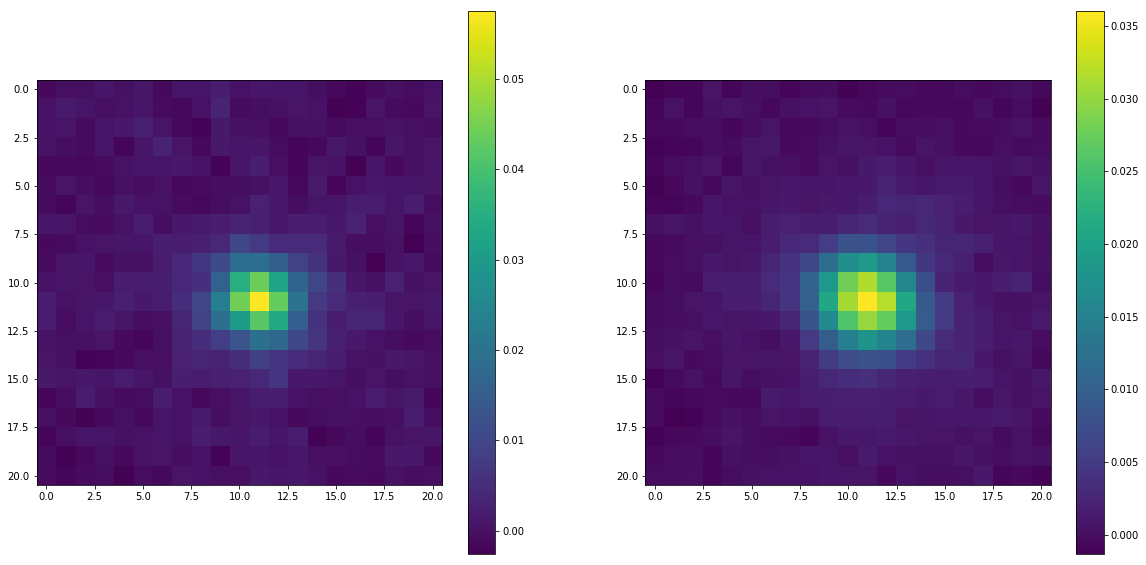

In [22]:
import pylab as plt
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.imshow(pacs100_psf[0].data[centre100-radius100:centre100+radius100+1,centre100-radius100:centre100+radius100+1])
plt.colorbar()
plt.subplot(1,2,2)
plt.imshow(pacs160_psf[0].data[centre160-radius160:centre160+radius160+1,centre160-radius160:centre160+radius160+1])
plt.colorbar()

## Set XID+ prior class

In [23]:
#---prior100--------
prior100=xidplus.prior(im100,nim100,im100phdu,im100hdu, moc=Final)#Initialise with map, uncertianty map, wcs info and primary header
prior100.prior_cat(prior['RA'] ,prior['Dec'] ,'GAMA-15_Ldust_prediction_results.fits',ID=prior['help_id'])#Set input catalogue
prior100.prior_bkg(0.0,5)#Set prior on background (assumes Gaussian pdf with mu and sigma)

#---prior160--------
prior160=xidplus.prior(im160,nim160,im160phdu,im160hdu, moc=Final)
prior160.prior_cat(prior['RA'] ,prior['Dec'] ,'GAMA-15_Ldust_prediction_results.fits',ID=prior['help_id'])
prior160.prior_bkg(0.0,5)

Private attributes "_naxis1" and "_naxis2" have been deprecated since v3.1.
Instead use the "pixel_shape" property which returns a list of NAXISj keyword values.
 [astropy.wcs.wcs]
Private attributes "_naxis1" and "_naxis2" have been deprecated since v3.1.
Instead use the "pixel_shape" property which returns a list of NAXISj keyword values.
 [astropy.wcs.wcs]


MemoryError: 

In [16]:
# Divide by 1000 so that units are mJy
prior100.set_prf(pacs100_psf[0].data[centre100-radius100:centre100+radius100+1,centre100-radius100:centre100+radius100+1]/1000.0,
                pind100,pind100)
prior160.set_prf(pacs160_psf[0].data[centre160-radius160:centre160+radius160+1,centre160-radius160:centre160+radius160+1]/1000.0,
                pind160,pind160)

In [2]:
import pickle
#from moc, get healpix pixels at a given order
from xidplus import moc_routines
order=11
tiles=moc_routines.get_HEALPix_pixels(order,prior100.sra,prior100.sdec,unique=True)
order_large=6
tiles_large=moc_routines.get_HEALPix_pixels(order_large,prior100.sra,prior100.sdec,unique=True)
print('----- There are '+str(len(tiles))+' tiles required for input catalogue and '+str(len(tiles_large))+' large tiles')
output_folder='./data/'
xidplus.io.pickle_dump({'priors':[prior100,prior160],'tiles':tiles,'order':order,'version':xidplus.io.git_version()},'Master_prior.pkl')
outfile=output_folder+'Tiles.pkl'
with open(outfile, 'wb') as f:
    pickle.dump({'tiles':tiles,'order':order,'tiles_large':tiles_large,'order_large':order_large,'version':xidplus.io.git_version()},f)
raise SystemExit()

In [1]:
#ls -ltrh